## mmdcookies
Detect broken rounded biscuits.

## Description
The input image is a gray-scale image of two rounded-shaped biscuits. One of them is broken. The purpose is to detect the broken biscuit.

In [3]:
import numpy as np
from PIL import Image
import ia870 as ia

# Reading
The input image is read

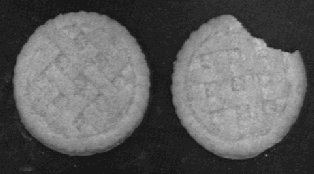

In [4]:
a_pil = Image.open('data/cookies.tif').convert('L')
a_pil

In [5]:
a = np.array (a_pil)

# Thresholding
Convert to binary objects by thresholding 

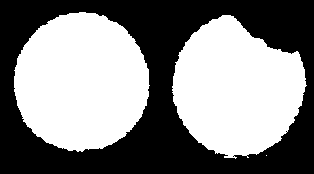

In [6]:
b = ia.iathreshad(a, 100);
Image.fromarray(b.astype(np.uint8)*255)

# Open tophat with large octagon disk

The tophat of the binary image by an octagon disk with a radius fits the good biscuit but does not fit in the broken biscuit can detect the broken one. 

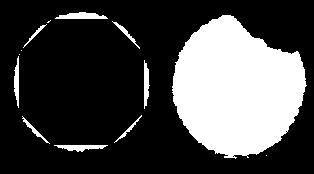

In [7]:
c = ia.iaopenth(b,ia.iasedisk(55,'2D','OCTAGON'));
Image.fromarray(c.astype(np.uint8)*255)

# Remove the residues
Clean the residues from the octagon disk and the rounded shaped biscuits by eliminating small connected regions 

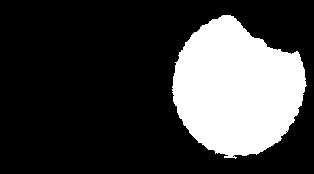

In [8]:
d = ia.iaareaopen(c,400);
Image.fromarray(d.astype(np.uint8)*255)

# Final display
Display the detected broken biscuit 

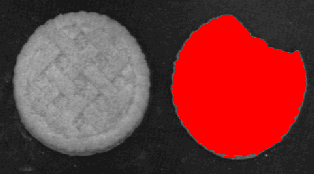

In [9]:
Image.fromarray(ia.iagshow(a, d).transpose(1, 2, 0))